# Analysis of 2017/2018 NBA Regular Season 

#### *Adrian R Angkawijaya*
#### *June 2018*

## Introduction

This is an analysis project of exploring the data for 2017/2018 NBA regular season. The dataset was taken from the Basketball Reference website. Click [here](https://www.basketball-reference.com/leagues/NBA_2018_per_game.html) to get access of the data.

The data contains all the player's stats such as three point shots made, field goals percentage, total rebounds and so on. It also lists the age, positions and team name for each player. This [link](https://www.basketball-reference.com/about/glossary.html) shows the glossary of all these variables.

**Note:** To not make the report very long, I decided to only include the analysis of 16 NBA teams that made it to the playoff.

Let's start !

## Data Preparation

**Import the necessary libraries:**

In [1]:
## Data Analysis
import numpy as np
import pandas as pd

## Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

**Load the data file:**

In [2]:
nba = pd.read_csv("/Users/adrianromano/Downloads/NBA_2018.csv")

**See the first few rows of the data:**

In [3]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,0.557,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


**See the dimension of the data:**

In [4]:
nba.shape

(664, 30)

**Note:** The data contains 664 observations with 30 variables.

**See the data types of each column:**

In [5]:
nba.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PS/G      float64
dtype: object

**Check for missing values:**

In [6]:
nba_NA = nba.isnull().sum()
nba_NA = nba_NA.drop(nba_NA[nba_NA == 0].index).sort_values(ascending = False)

print(nba_NA)

3P%     65
FT%     58
2P%     18
eFG%     4
FG%      4
dtype: int64


**Drop the columns with missing values and others that will not be used in the analysis:**

In [7]:
nba.drop(["Rk"], axis = 1, inplace = True)
nba.drop(["FG%"], axis = 1, inplace = True)
nba.drop(["3P%"], axis = 1, inplace = True)
nba.drop(["FT%"], axis = 1, inplace = True)
nba.drop(["2P%"], axis = 1, inplace = True)
nba.drop(["eFG%"], axis = 1, inplace = True)
nba.drop(["ORB"], axis = 1, inplace = True)
nba.drop(["DRB"], axis = 1, inplace = True)
nba.drop(["G"], axis = 1, inplace = True)

**Filter the data only containing the 2018 playoff NBA team:**

**Note:** Also, keep only the players with more than 10 minutes played per game

In [8]:
nba = nba.loc[(nba.Tm == "OKC") |
              (nba.Tm == "NOP") |
              (nba.Tm == "IND") |
              (nba.Tm == "WAS") |
              (nba.Tm == "MIA") |
              (nba.Tm == "MIN") |
              (nba.Tm == "BOS") |
              (nba.Tm == "TOR") |
              (nba.Tm == "CLE") |
              (nba.Tm == "POR") |
              (nba.Tm == "MIL") |
              (nba.Tm == "UTA") |
              (nba.Tm == "PHI") |
              (nba.Tm == "SAS") |
              (nba.Tm == "GSW") |
              (nba.Tm == "HOU")]

nba = nba.loc[(nba.MP > 10)]

nba.head()

,Player,Pos,Age,Tm,GS,MP,FG,FGA,3P,3PA,...,2PA,FT,FTA,TRB,AST,STL,BLK,TOV,PF,PS/G
0,Alex Abrines,SG,24,OKC,8,15.1,1.5,3.9,1.1,2.9,...,0.9,0.5,0.6,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,Steven Adams,C,24,OKC,76,32.7,5.9,9.4,0.0,0.0,...,9.3,2.1,3.8,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,19,19.8,2.5,4.9,0.0,0.1,...,4.8,1.9,2.6,5.5,1.5,0.5,0.6,1.0,2.0,6.9
6,LaMarcus Aldridge,C,32,SAS,75,33.5,9.2,18.0,0.4,1.2,...,16.7,4.5,5.3,8.5,2.0,0.6,1.2,1.5,2.2,23.1
9,Tony Allen,SF,36,NOP,0,12.4,2.0,4.1,0.2,0.5,...,3.6,0.5,1.0,2.1,0.4,0.5,0.1,0.9,2.2,4.7


**Rename the columns:**

In [9]:
nba.columns = ["Player", "Position", "Age", "Team", "Starter", "Minutes", 
               "FG", "FGA", "Three", "Three_A", "Two", "Two_A", "FT", "FTA", 
               "Rebound", "Assist", "Steal", "Block", "Turnover","Personal_fouls", "Points"]

**Rename the team names to their full names:**

In [10]:
code_list = [['Team', 
              {'OKC' : 'Oklahoma City Thunder', 
               'NOP' : 'New Orleans Pelicans', 
               'IND' : 'Indiana Pacers', 
               'WAS' : 'Washington Wizards',
               'MIA' : 'Miami Heat', 
               'MIN' : 'Minnesota Timberwolves', 
               'BOS' : 'Boston Celtics', 
               'TOR' : 'Toronto Raptors',
               'CLE' : 'Cleveland Cavaliers', 
               'POR' : 'Portland Trail Blazers', 
               'MIL' : 'Milwaukee Bucks', 
               'UTA' : 'Utah Jazz',
               'PHI' : 'Philadelphia Sixers', 
               'SAS' : 'San Antonio Spurs', 
               'GSW' : 'Golden State Warriors', 
               'HOU' : 'Houston Rockets'}]]
           

for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    nba[col] = [dic[x] for x in nba[col]]
    
nba.head()

,Player,Position,Age,Team,Starter,Minutes,FG,FGA,Three,Three_A,...,Two_A,FT,FTA,Rebound,Assist,Steal,Block,Turnover,Personal_fouls,Points
0,Alex Abrines,SG,24,Oklahoma City Thunder,8,15.1,1.5,3.9,1.1,2.9,...,0.9,0.5,0.6,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,Steven Adams,C,24,Oklahoma City Thunder,76,32.7,5.9,9.4,0.0,0.0,...,9.3,2.1,3.8,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,Miami Heat,19,19.8,2.5,4.9,0.0,0.1,...,4.8,1.9,2.6,5.5,1.5,0.5,0.6,1.0,2.0,6.9
6,LaMarcus Aldridge,C,32,San Antonio Spurs,75,33.5,9.2,18.0,0.4,1.2,...,16.7,4.5,5.3,8.5,2.0,0.6,1.2,1.5,2.2,23.1
9,Tony Allen,SF,36,New Orleans Pelicans,0,12.4,2.0,4.1,0.2,0.5,...,3.6,0.5,1.0,2.1,0.4,0.5,0.1,0.9,2.2,4.7


## Exploratory Data Analysis

**See the number of players by position and teams:**

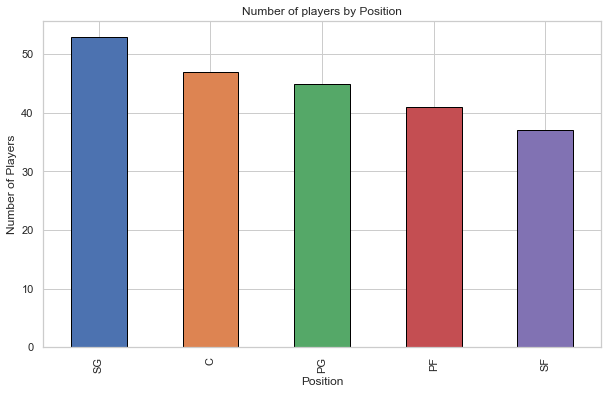

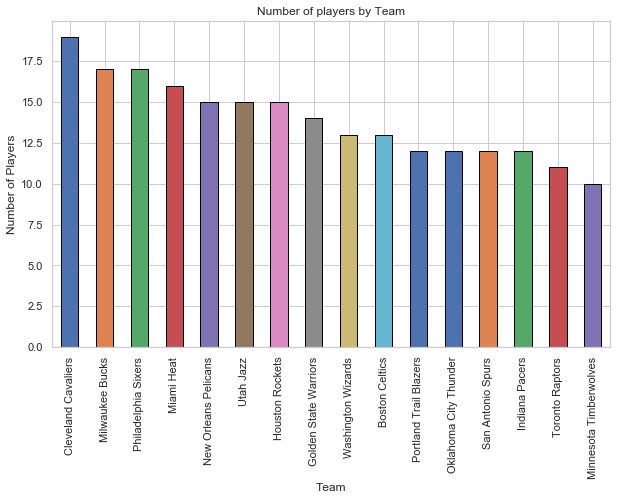

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

def plot_bars(nba, cols):
    for col in cols:
        fig = plt.figure(figsize=(10,6)) 
        ax = fig.gca()    
        counts = nba[col].value_counts() 
        counts.plot.bar(ax = ax, edgecolor='black') 
        ax.set_title('Number of players by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of Players')
        plt.xticks(rotation=90)
        plt.show()

plot_cols = ["Position", "Team"]
plot_bars(nba, plot_cols)

* The Shooting Guard positions had the most players overall while Small Forward positions had the least.

* Cleveland Cavaliers had the most players while Minnesota Timberwolves had the least number of players.

**See the summary statistics of the numerical variables:**

In [12]:
nba.describe()

,Age,Starter,Minutes,FG,FGA,Three,Three_A,Two,Two_A,FT,FTA,Rebound,Assist,Steal,Block,Turnover,Personal_fouls,Points
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,27.282511,29.130045,22.956951,3.759641,8.093722,0.992377,2.741256,2.767265,5.356054,1.586996,2.045740,4.098655,2.210762,0.760090,0.472197,1.283857,1.915695,10.090583
std,4.366747,31.093091,7.614882,2.170043,4.500136,0.857287,2.201106,1.843702,3.431091,1.456721,1.766114,2.383813,1.909193,0.456952,0.439428,0.864468,0.647709,6.137718
min,19.000000,0.000000,10.200000,0.700000,1.900000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.200000,1.800000
25%,24.000000,2.000000,15.800000,2.050000,4.550000,0.300000,0.900000,1.400000,2.800000,0.700000,0.850000,2.350000,0.900000,0.400000,0.200000,0.700000,1.500000,5.400000
50%,27.000000,12.000000,22.400000,3.100000,7.100000,0.800000,2.300000,2.300000,4.600000,1.100000,1.500000,3.600000,1.600000,0.600000,0.300000,1.100000,1.900000,8.300000
75%,30.000000,63.000000,29.250000,5.000000,10.450000,1.500000,4.050000,3.600000,7.100000,2.000000,2.650000,5.150000,2.900000,1.000000,0.600000,1.700000,2.300000,12.800000
max,40.000000,82.000000,36.900000,10.500000,21.100000,4.200000,10.000000,9.700000,17.300000,8.700000,10.100000,12.900000,10.300000,2.400000,2.600000,5.000000,4.000000,30.400000


**Set custom color to each team for visualizations:**

In [13]:
nba_colors = ["#007AC1", # OKC
              "#CE1141", # MIA
              "#C4CED4", # SAS
              "#85714D", # NOP
              "#E03A3E", # POR
              "#552583", # PHI
              "#a8415b", # HOU
              "#00471B", # MIL
              "#B4975A", # TOR
              "#007A33", # BOS
              "#002B5C", # WAS
              "#fce166", # GSW
              "#78BE20", # MIN
              "#efc0fe", # IND
              "#F9A01B", # UTA
              "#6F263D"] # CLE

teams_palette = sns.color_palette(nba_colors)

### **Points per game**

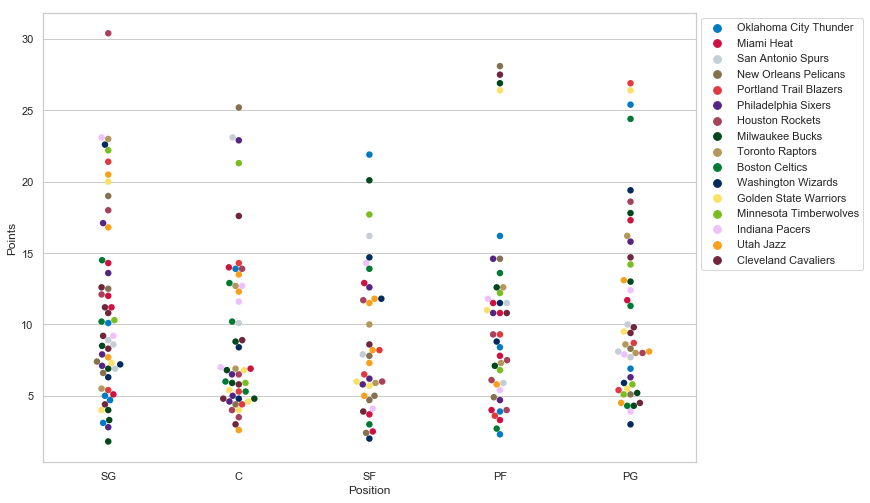

In [14]:
sns.swarmplot(x='Position', 
              y='Points', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is shown that Power Forward and Point Guard players contributed a lot in the number of points per game.
* There is a Shooting Guard player from the Houston Rockets with a very high points per game.
* The other notable ones include Power Forward players from the New Orleans Pelicans and Cleveland Cavaliers. 

Let's see which players had the highest and lowest number of points per game.

**Which overall players made the most points per game?**

In [15]:
## Overall
nba.loc[nba.Points > 27, ["Player","Position",'Team', "Points"]].sort_values(by='Points', ascending=False)

,Player,Position,Team,Points
232,James Harden,SG,Houston Rockets,30.4
148,Anthony Davis,PF,New Orleans Pelicans,28.1
303,LeBron James,PF,Cleveland Cavaliers,27.5


**Which Point Guard players made the most points per game?**

In [16]:
## Point Guard
nba.loc[(nba.Points > 20)&
        (nba.Position == "PG"), ["Player","Position",'Team', "Points"]].sort_values(by='Points', ascending=False)

,Player,Position,Team,Points
369,Damian Lillard,PG,Portland Trail Blazers,26.9
146,Stephen Curry,PG,Golden State Warriors,26.4
625,Russell Westbrook,PG,Oklahoma City Thunder,25.4
292,Kyrie Irving,PG,Boston Celtics,24.4


**Which Shooting Guard players made the most points per game?**

In [17]:
## Shooting Guard
nba.loc[(nba.Points > 22)&
        (nba.Position == "SG"), ["Player","Position",'Team', "Points"]].sort_values(by='Points', ascending=False)

,Player,Position,Team,Points
232,James Harden,SG,Houston Rockets,30.4
472,Victor Oladipo,SG,Indiana Pacers,23.1
156,DeMar DeRozan,SG,Toronto Raptors,23.0
40,Bradley Beal,SG,Washington Wizards,22.6
93,Jimmy Butler,SG,Minnesota Timberwolves,22.2


**Which Small Forward players made the most points per game?**

In [18]:
## Small Forward
nba.loc[(nba.Points > 17)&
        (nba.Position == "SF"), ["Player","Position",'Team', "Points"]].sort_values(by='Points', ascending=False)

,Player,Position,Team,Points
209,Paul George,SF,Oklahoma City Thunder,21.9
411,Khris Middleton,SF,Milwaukee Bucks,20.1
631,Andrew Wiggins,SF,Minnesota Timberwolves,17.7


**Which Power Forward players made the most points per game?**

In [19]:
## Power Forward
nba.loc[(nba.Points > 22)&
        (nba.Position == "PF"), ["Player","Position",'Team', "Points"]].sort_values(by='Points', ascending=False)

,Player,Position,Team,Points
148,Anthony Davis,PF,New Orleans Pelicans,28.1
303,LeBron James,PF,Cleveland Cavaliers,27.5
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,26.9
171,Kevin Durant,PF,Golden State Warriors,26.4


**Which Center players made the most points per game?**

In [20]:
## Center
nba.loc[(nba.Points > 20)&
        (nba.Position == "C"), ["Player","Position",'Team', "Points"]].sort_values(by='Points', ascending=False)

,Player,Position,Team,Points
134,DeMarcus Cousins,C,New Orleans Pelicans,25.2
6,LaMarcus Aldridge,C,San Antonio Spurs,23.1
177,Joel Embiid,C,Philadelphia Sixers,22.9
591,Karl-Anthony Towns,C,Minnesota Timberwolves,21.3


**Which overall players made the least points per game?**

In [21]:
## Overall
nba.loc[nba.Points < 2.4, ["Player","Position",'Team', "Points"]].sort_values(by='Points', ascending=True)

,Player,Position,Team,Points
367,DeAndre Liggins,SG,Milwaukee Bucks,1.8
530,Devin Robinson,SF,Washington Wizards,2.0
281,Josh Huestis,PF,Oklahoma City Thunder,2.3


### **Age of players**

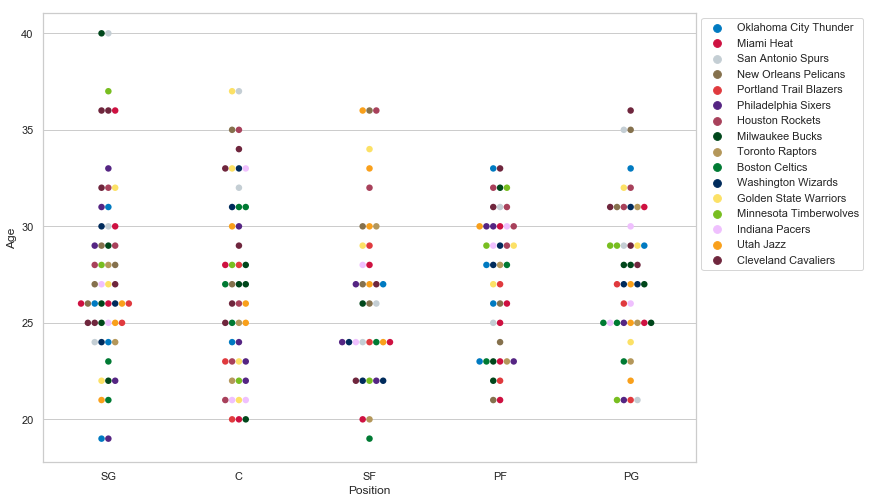

In [22]:
sns.swarmplot(x='Position', 
              y='Age', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is shown that the oldest players are from the Shooting Guard positions in the San Antonio Spurs and Milwaukee Bucks.
* The youngest players are the Shooting Guard players in Oklahoma City Thunder, Boston Celtics and Philadelphia Sixers.

Let's see which players were the oldest and youngest in the season.

**Which players were the oldest?**

In [23]:
nba.loc[nba.Age > 36, ["Player","Position",'Team', "Age"]].sort_values(by='Age', ascending=False)

,Player,Position,Team,Age
213,Manu Ginobili,SG,San Antonio Spurs,40
581,Jason Terry,SG,Milwaukee Bucks,40
138,Jamal Crawford,SG,Minnesota Timberwolves,37
207,Pau Gasol,C,San Antonio Spurs,37
624,David West,C,Golden State Warriors,37


**Which players were the youngest?**

In [24]:
nba.loc[nba.Age == 19, ["Player","Position",'Team', "Age"]]

,Player,Position,Team,Age
193,Terrance Ferguson,SG,Oklahoma City Thunder,19
203,Markelle Fultz,SG,Philadelphia Sixers,19
574,Jayson Tatum,SF,Boston Celtics,19


### Minutes per game

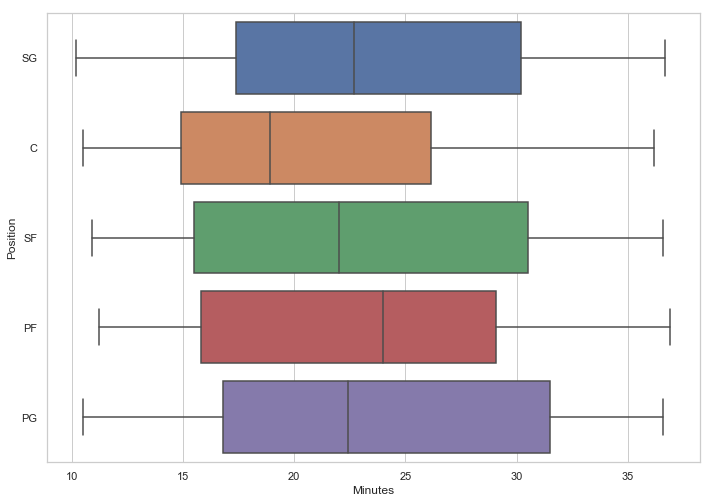

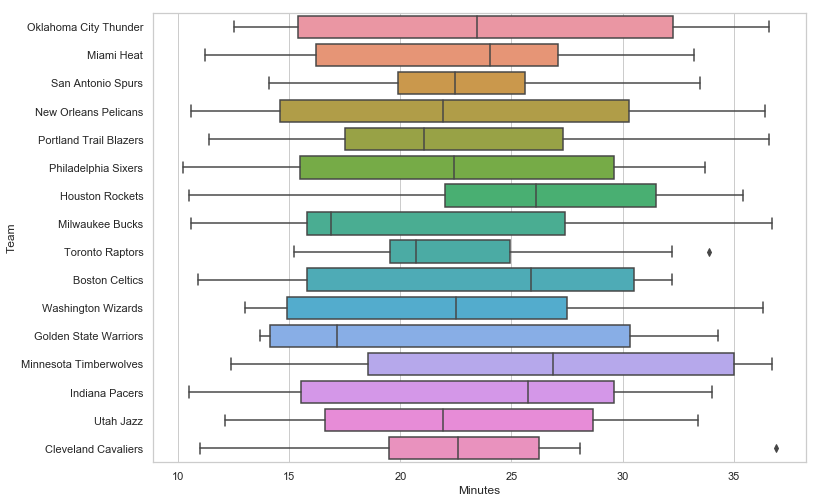

In [25]:
def plot_box(nba, cols, col_y = 'Minutes'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_y, col, data=nba)
        plt.xlabel(col_y) 
        plt.ylabel(col)
        plt.show()
        
cat_cols = ['Position', 'Team']
plot_box(nba, cat_cols)

* It is shown that Power Forward players had the highest median of minutes played while Center players had the lowest.

* Minnesota Timberwolves players had the highest median of minutes played while Milwaukee Bucks players had the lowest.

Let's see which players had the highest and lowest minutes per game.

**Which players had the most minutes played per game?**

In [26]:
nba.loc[nba.Minutes > 36.5, ["Player","Position",'Team', "Minutes"]].sort_values(by='Minutes', ascending=False)

,Player,Position,Team,Minutes
303,LeBron James,PF,Cleveland Cavaliers,36.9
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,36.7
93,Jimmy Butler,SG,Minnesota Timberwolves,36.7
209,Paul George,SF,Oklahoma City Thunder,36.6
369,Damian Lillard,PG,Portland Trail Blazers,36.6


**Which players had the least minutes played per game?**

In [27]:
nba.loc[nba.Minutes < 10.6, ["Player","Position",'Team', "Minutes"]].sort_values(by='Minutes', ascending=False)

,Player,Position,Team,Minutes
55,Tarik Black,C,Houston Rockets,10.5
654,Joe Young,PG,Indiana Pacers,10.5
653,James Young,SG,Philadelphia Sixers,10.2


### Games Started

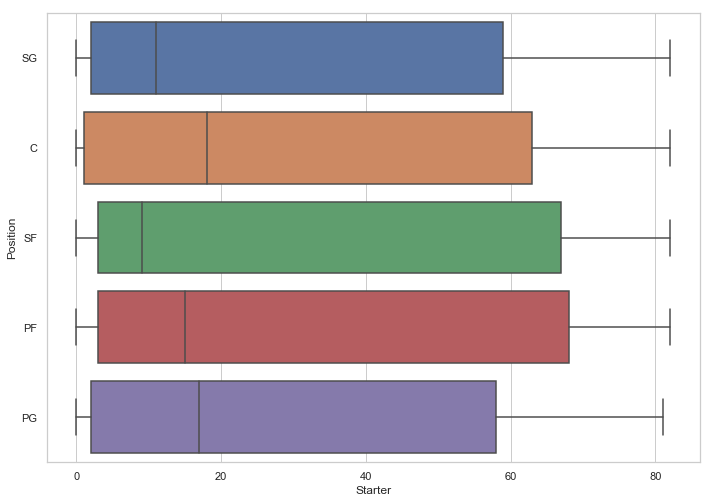

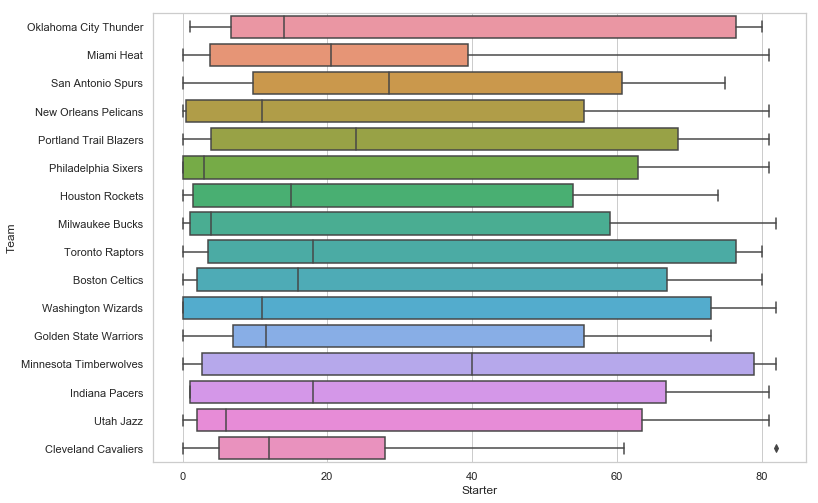

In [28]:
def plot_box(nba, cols, col_y = 'Starter'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_y, col, data=nba)
        plt.xlabel(col_y) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
cat_cols = ['Position', 'Team']
plot_box(nba, cat_cols) 

* Center players had the highest median of the number of games started while small forwards had the lowest.

* Minnesota Timberwolves players had the highest median of the number of games started while Philadelphia Sixers players had the lowest.

Let's see which players started the most games.

**Which players started the most games?**

In [29]:
nba.loc[nba.Starter == 82, ["Player","Position",'Team', "Starter"]]

,Player,Position,Team,Starter
40,Bradley Beal,SG,Washington Wizards,82
212,Taj Gibson,PF,Minnesota Timberwolves,82
217,Marcin Gortat,C,Washington Wizards,82
303,LeBron James,PF,Cleveland Cavaliers,82
411,Khris Middleton,SF,Milwaukee Bucks,82
591,Karl-Anthony Towns,C,Minnesota Timberwolves,82
631,Andrew Wiggins,SF,Minnesota Timberwolves,82


### Field Goals per game

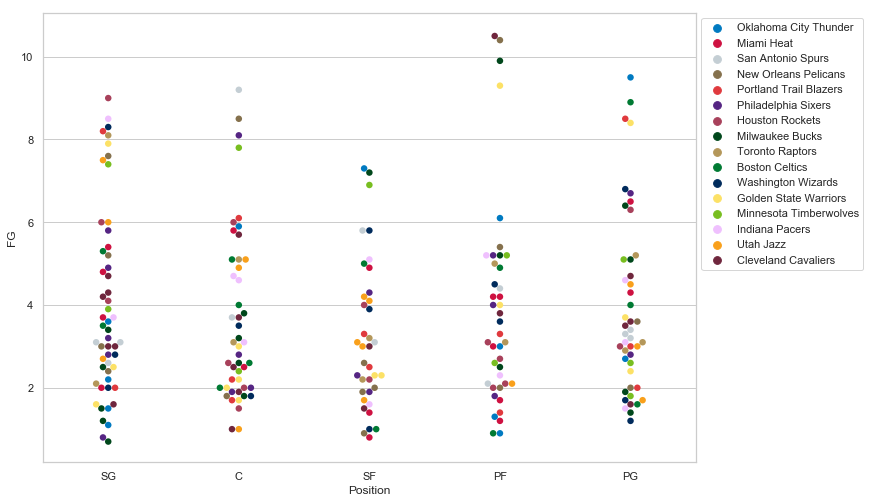

In [30]:
sns.swarmplot(x='Position', 
              y='FG', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is shown that Power Forward and Point Guard players contributed the most to the high number of field goals.
* Some of the notable ones include the Power Forward players from the New Orleans Pelicans, Cleveland Cavaliers and Milwaukee Bucks.

Let's see which players had the highest and lowest number of field goals below.

**Which overall players made the most field goals per game?**

In [31]:
## Overall
nba.loc[nba.FG > 9.8, ["Player","Position","Team", "FG"]].sort_values(by='FG', ascending=False)

,Player,Position,Team,FG
303,LeBron James,PF,Cleveland Cavaliers,10.5
148,Anthony Davis,PF,New Orleans Pelicans,10.4
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,9.9


**Which Point Guard players made the most field goals per game?**

In [32]:
## Point Guard
nba.loc[(nba.FG > 8) &
        (nba.Position == "PG"), ["Player","Position","Team", "FG"]].sort_values(by='FG', ascending=False)

,Player,Position,Team,FG
625,Russell Westbrook,PG,Oklahoma City Thunder,9.5
292,Kyrie Irving,PG,Boston Celtics,8.9
369,Damian Lillard,PG,Portland Trail Blazers,8.5
146,Stephen Curry,PG,Golden State Warriors,8.4


**Which Shooting Guard players made the most field goals per game?**

In [33]:
## Shooting Guard
nba.loc[(nba.FG > 8.1) &
        (nba.Position == "SG"), ["Player","Position","Team", "FG"]].sort_values(by='FG', ascending=False)

,Player,Position,Team,FG
232,James Harden,SG,Houston Rockets,9.0
472,Victor Oladipo,SG,Indiana Pacers,8.5
40,Bradley Beal,SG,Washington Wizards,8.3
395,CJ McCollum,SG,Portland Trail Blazers,8.2


**Which Small Forward players made the most field goals per game?**

In [34]:
## Small Forward
nba.loc[(nba.FG > 6) &
        (nba.Position == "SF"), ["Player","Position","Team", "FG"]].sort_values(by='FG', ascending=False)

,Player,Position,Team,FG
209,Paul George,SF,Oklahoma City Thunder,7.3
411,Khris Middleton,SF,Milwaukee Bucks,7.2
631,Andrew Wiggins,SF,Minnesota Timberwolves,6.9


**Which Power Forward players made the most field goals per game?**

In [35]:
## Power Forward
nba.loc[(nba.FG > 9) &
        (nba.Position == "PF"), ["Player","Position","Team", "FG"]].sort_values(by='FG', ascending=False)

,Player,Position,Team,FG
303,LeBron James,PF,Cleveland Cavaliers,10.5
148,Anthony Davis,PF,New Orleans Pelicans,10.4
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,9.9
171,Kevin Durant,PF,Golden State Warriors,9.3


**Which Center players made the most field goals per game?**

In [36]:
## Center
nba.loc[(nba.FG > 8) &
        (nba.Position == "C"), ["Player","Position","Team", "FG"]].sort_values(by='FG', ascending=False)

,Player,Position,Team,FG
6,LaMarcus Aldridge,C,San Antonio Spurs,9.2
134,DeMarcus Cousins,C,New Orleans Pelicans,8.5
177,Joel Embiid,C,Philadelphia Sixers,8.1


**Which overall players made the least field goals per game?**

In [37]:
nba.loc[nba.FG < 0.9, ["Player","Position",'Team', "FG"]].sort_values(by='FG', ascending=True)

,Player,Position,Team,FG
367,DeAndre Liggins,SG,Milwaukee Bucks,0.7
28,Luke Babbitt,SF,Miami Heat,0.8
653,James Young,SG,Philadelphia Sixers,0.8


**Which players attempted the most field goals per game?**

In [38]:
# FGA = Field Goals attempted per game
nba.loc[nba.FGA > 19.4, ["Player","Position",'Team', "FGA"]].sort_values(by='FGA', ascending=False)

,Player,Position,Team,FGA
625,Russell Westbrook,PG,Oklahoma City Thunder,21.1
232,James Harden,SG,Houston Rockets,20.1
148,Anthony Davis,PF,New Orleans Pelicans,19.5


### Three Points per game

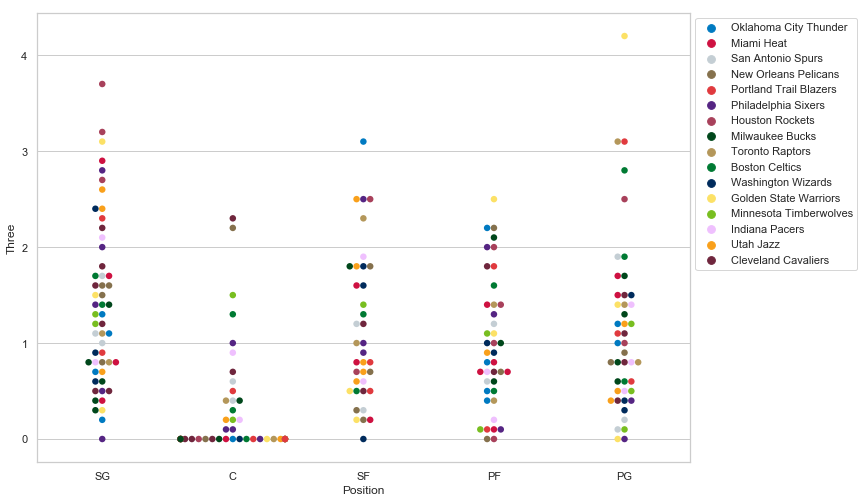

In [39]:
sns.swarmplot(x='Position', 
              y='Three', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is shown that the Point Guard and Shooting Guard players contributed a lot in three point shot numbers.
* There is a Point Guard player from the Golden State Warriors with a very high three point shots count.
* The other notable ones include Shooting Guard Players from the Houston Rockets and another player from the Golden State Warriors.

Let's see which players had the highest and lowest number of three point shots made.

**Which overall players made the most points per game from three points?**

In [40]:
# Three = Three point shots made per game
nba.loc[nba.Three > 3.1, ["Player","Position","Team", "Three"]].sort_values(by='Three', ascending=False)

,Player,Position,Team,Three
146,Stephen Curry,PG,Golden State Warriors,4.2
232,James Harden,SG,Houston Rockets,3.7
216,Eric Gordon,SG,Houston Rockets,3.2


**Which Point Guard players made the most points per game from three points?**

In [41]:
## Point Guard
nba.loc[(nba.Three > 3) &
        (nba.Position == "PG"), ["Player","Position","Team", "Three"]].sort_values(by='Three', ascending=False)

,Player,Position,Team,Three
146,Stephen Curry,PG,Golden State Warriors,4.2
369,Damian Lillard,PG,Portland Trail Blazers,3.1
376,Kyle Lowry,PG,Toronto Raptors,3.1


**Which Shooting Guard players made the most points per game from three points?**

In [42]:
## Shooting Guard
nba.loc[(nba.Three > 3) &
        (nba.Position == "SG"), ["Player","Position","Team", "Three"]].sort_values(by='Three', ascending=False)

,Player,Position,Team,Three
232,James Harden,SG,Houston Rockets,3.7
216,Eric Gordon,SG,Houston Rockets,3.2
587,Klay Thompson,SG,Golden State Warriors,3.1


**Which Small Forward players made the most points per game from three points?**

In [43]:
## Small Forward
nba.loc[(nba.Three > 2.4) &
        (nba.Position == "SF"), ["Player","Position","Team", "Three"]].sort_values(by='Three', ascending=False)

,Player,Position,Team,Three
209,Paul George,SF,Oklahoma City Thunder,3.1
19,Trevor Ariza,SF,Houston Rockets,2.5
135,Robert Covington,SF,Philadelphia Sixers,2.5
289,Joe Ingles,SF,Utah Jazz,2.5


**Which Power Forward players made the most points per game from three points?**

In [44]:
## Power Forward
nba.loc[(nba.Three > 2.1) &
        (nba.Position == "PF"), ["Player","Position","Team", "Three"]].sort_values(by='Three', ascending=False)

,Player,Position,Team,Three
171,Kevin Durant,PF,Golden State Warriors,2.5
16,Carmelo Anthony,PF,Oklahoma City Thunder,2.2
419,Nikola Mirotic,PF,New Orleans Pelicans,2.2


**Which Center players made the most points per game from three points?**

In [45]:
## Center
nba.loc[(nba.Three > 1) &
        (nba.Position == "C"), ["Player","Position","Team", "Three"]].sort_values(by='Three', ascending=False)

,Player,Position,Team,Three
375,Kevin Love,C,Cleveland Cavaliers,2.3
134,DeMarcus Cousins,C,New Orleans Pelicans,2.2
591,Karl-Anthony Towns,C,Minnesota Timberwolves,1.5
278,Al Horford,C,Boston Celtics,1.3


**Which players made the least points per game from three points?**

**Note:** Center position players are not included.

In [46]:
# Three = Three point shots made per game
nba.loc[(nba.Three == 0) & (nba.Position != "C"), ["Player", "Position","Team", "Three"]]

,Player,Position,Team,Three
157,Cheick Diallo,PF,New Orleans Pelicans,0.0
203,Markelle Fultz,SG,Philadelphia Sixers,0.0
371,Shaun Livingston,PG,Golden State Warriors,0.0
530,Devin Robinson,SF,Washington Wizards,0.0
554,Ben Simmons,PG,Philadelphia Sixers,0.0
650,Brandan Wright,PF,Houston Rockets,0.0


**Which players attempted the most three point shots per game?**

In [47]:
# Three_A = Three point shots attempted per game
nba.loc[(nba.Three_A > 8.5), ["Player","Position","Team", "Three_A"]].sort_values(by='Three_A', ascending=False)

,Player,Position,Team,Three_A
232,James Harden,SG,Houston Rockets,10.0
146,Stephen Curry,PG,Golden State Warriors,9.8
216,Eric Gordon,SG,Houston Rockets,8.8
369,Damian Lillard,PG,Portland Trail Blazers,8.6


### Two Points per game

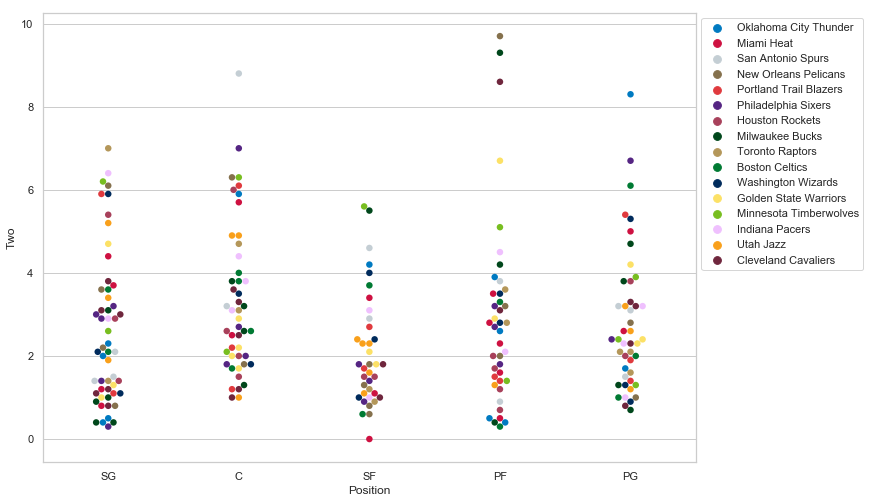

In [48]:
sns.swarmplot(x='Position', 
              y='Two', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is shown that there are quite a number of Power forward players with high two point shots count.
* The notable ones include Power Forward players from the New Orleans Pelicans, Milwaukee Bucks and Cleveland Cavaliers. 
* There is also a Center player from the San Antonio Spurs with a high two point shots count.

Let's see which players had the highest and lowest number of two point shots made.

**Which overall players made the most points per game from two points?**

In [49]:
## Two = Two point shots per game
nba.loc[(nba.Two > 8.5), ["Player","Position","Team", "Two"]].sort_values(by='Two', ascending=False)

,Player,Position,Team,Two
148,Anthony Davis,PF,New Orleans Pelicans,9.7
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,9.3
6,LaMarcus Aldridge,C,San Antonio Spurs,8.8
303,LeBron James,PF,Cleveland Cavaliers,8.6


**Which Point Guard players made the most points per game from two points?**

In [50]:
## Point Guard
nba.loc[(nba.Two > 6) &
        (nba.Position == "PG"),["Player","Position","Team", "Two"]].sort_values(by='Two', ascending=False)

,Player,Position,Team,Two
625,Russell Westbrook,PG,Oklahoma City Thunder,8.3
554,Ben Simmons,PG,Philadelphia Sixers,6.7
292,Kyrie Irving,PG,Boston Celtics,6.1


**Which Shooting Guard players made the most points per game from two points?**

In [51]:
## Shooting Guard
nba.loc[(nba.Two > 6) &
        (nba.Position == "SG"),["Player","Position","Team", "Two"]].sort_values(by='Two', ascending=False)

,Player,Position,Team,Two
156,DeMar DeRozan,SG,Toronto Raptors,7.0
472,Victor Oladipo,SG,Indiana Pacers,6.4
93,Jimmy Butler,SG,Minnesota Timberwolves,6.2
269,Jrue Holiday,SG,New Orleans Pelicans,6.1


**Which Small Forward players made the most points per game from two points?**

In [52]:
## Small Forward
nba.loc[(nba.Two > 4) &
        (nba.Position == "SF"),["Player","Position","Team", "Two"]].sort_values(by='Two', ascending=False)

,Player,Position,Team,Two
631,Andrew Wiggins,SF,Minnesota Timberwolves,5.6
411,Khris Middleton,SF,Milwaukee Bucks,5.5
362,Kawhi Leonard,SF,San Antonio Spurs,4.6
209,Paul George,SF,Oklahoma City Thunder,4.2


**Which Power Forward players made the most points per game from two points?**

In [53]:
## Power Forward
nba.loc[(nba.Two > 6) &
        (nba.Position == "PF"),["Player","Position","Team", "Two"]].sort_values(by='Two', ascending=False)

,Player,Position,Team,Two
148,Anthony Davis,PF,New Orleans Pelicans,9.7
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,9.3
303,LeBron James,PF,Cleveland Cavaliers,8.6
171,Kevin Durant,PF,Golden State Warriors,6.7


**Which Center players made the most points per game from two points?**

In [54]:
## Center
nba.loc[(nba.Two > 6.1) &
        (nba.Position == "C"),["Player","Position","Team", "Two"]].sort_values(by='Two', ascending=False)

,Player,Position,Team,Two
6,LaMarcus Aldridge,C,San Antonio Spurs,8.8
177,Joel Embiid,C,Philadelphia Sixers,7.0
134,DeMarcus Cousins,C,New Orleans Pelicans,6.3
591,Karl-Anthony Towns,C,Minnesota Timberwolves,6.3


**Which overall players made the least points per game from two points?**

In [55]:
nba.loc[(nba.Two < 0.4), ["Player","Position","Team", "Two"]].sort_values(by='Two', ascending=True) 

,Player,Position,Team,Two
28,Luke Babbitt,SF,Miami Heat,0.0
467,Semi Ojeleye,PF,Boston Celtics,0.3
653,James Young,SG,Philadelphia Sixers,0.3


**Which players attempted the most two point shots per game?**

In [56]:
# Two_A = Two point shots attempted
nba.loc[(nba.Two_A > 16.7), ["Player", "Position","Team", "Two_A"]].sort_values(by='Two_A', ascending=False)

,Player,Position,Team,Two_A
148,Anthony Davis,PF,New Orleans Pelicans,17.3
625,Russell Westbrook,PG,Oklahoma City Thunder,17.0
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,16.8


### Free Throws per game

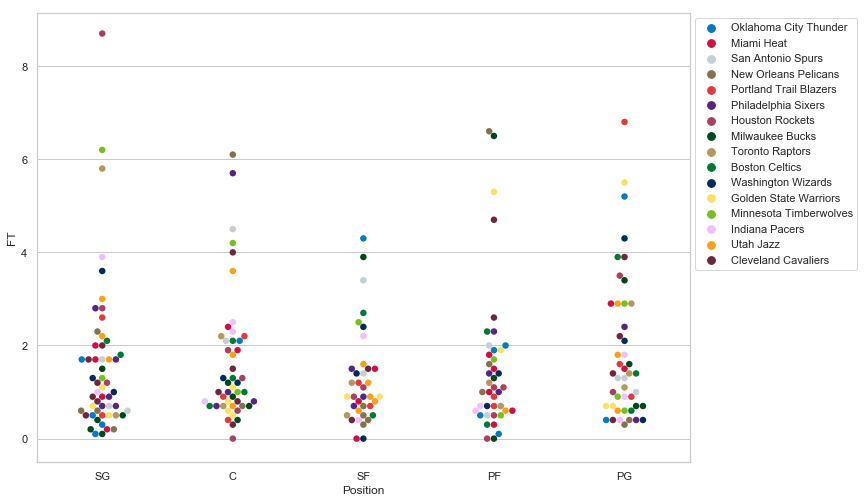

In [57]:
sns.swarmplot(x='Position', 
              y='FT', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* There is a Shooting Guard player from the Houston Rockets with a very high free throw number.
* The other notable ones include a Point Guard player from the Portland Trail Blazers and a Power Forward player from the New Orleans Pelicans.

Let's see which players had the highest and lowest number of free throws made.

**Which overall players made the most free throws per game?**

In [58]:
nba.loc[nba.FT > 6.5, ["Player","Position","Team", "FT"]].sort_values(by="FT", ascending=False)

,Player,Position,Team,FT
232,James Harden,SG,Houston Rockets,8.7
369,Damian Lillard,PG,Portland Trail Blazers,6.8
148,Anthony Davis,PF,New Orleans Pelicans,6.6


**Which players attempted the most free throws per game?**

In [59]:
# FTA = Free Throw Attempts per game
nba.loc[nba.FTA > 8, ["Player","Position", "Team", "FTA"]].sort_values(by='FTA', ascending=False)

,Player,Position,Team,FTA
232,James Harden,SG,Houston Rockets,10.1
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,8.5
134,DeMarcus Cousins,C,New Orleans Pelicans,8.2


### Rebounds per game

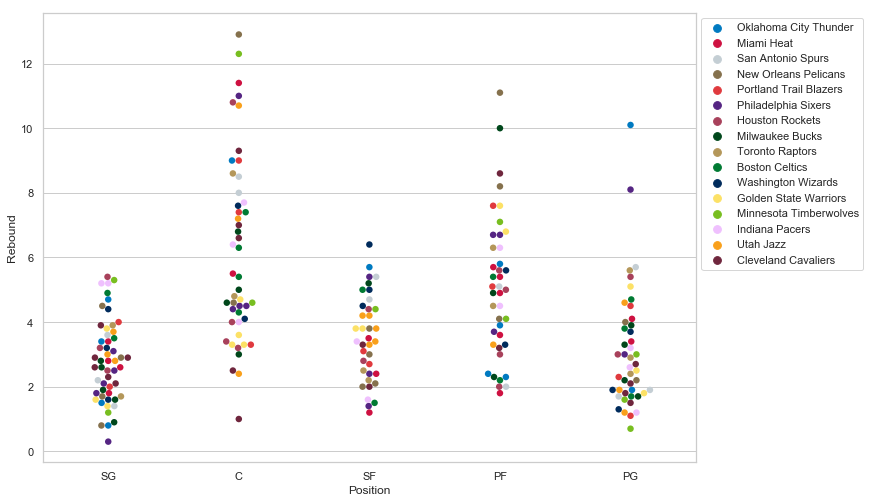

In [60]:
sns.swarmplot(x='Position', 
              y='Rebound', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is obvious that Center and Power Forward players contributed a lot in the number of Rebounds since they are the tallest ones.
* The notable ones include Center players from New Orleans Pelicans and Minnesota Timberwolves.

Let's see which players had the highest and lowest number of Rebounds.

**Which overall players made the most rebounds per game?**

In [61]:
## Overall
nba.loc[nba.Rebound > 11, ["Player","Position",'Team', 'Rebound']].sort_values(by='Rebound', ascending=False)

,Player,Position,Team,Rebound
134,DeMarcus Cousins,C,New Orleans Pelicans,12.9
591,Karl-Anthony Towns,C,Minnesota Timberwolves,12.3
630,Hassan Whiteside,C,Miami Heat,11.4
148,Anthony Davis,PF,New Orleans Pelicans,11.1


**Which Point Guard players made the most rebounds per game?**

In [62]:
## Point Guard
nba.loc[(nba.Rebound > 5.5) &
        (nba.Position == "PG"), ["Player","Position",'Team', 'Rebound']].sort_values(by='Rebound', ascending=False)

,Player,Position,Team,Rebound
625,Russell Westbrook,PG,Oklahoma City Thunder,10.1
554,Ben Simmons,PG,Philadelphia Sixers,8.1
444,Dejounte Murray,PG,San Antonio Spurs,5.7
376,Kyle Lowry,PG,Toronto Raptors,5.6


**Which Shooting Guard players made the most rebounds per game?**

In [63]:
## Shooting Guard
nba.loc[(nba.Rebound > 5) &
        (nba.Position == "SG"), ["Player","Position",'Team', 'Rebound']].sort_values(by='Rebound', ascending=False)

,Player,Position,Team,Rebound
232,James Harden,SG,Houston Rockets,5.4
93,Jimmy Butler,SG,Minnesota Timberwolves,5.3
472,Victor Oladipo,SG,Indiana Pacers,5.2
569,Lance Stephenson,SG,Indiana Pacers,5.2


**Which Small Forward players made the most rebounds per game?**

In [64]:
## Small Forward
nba.loc[(nba.Rebound > 5.3) &
        (nba.Position == "SF"), ["Player","Position",'Team', 'Rebound']].sort_values(by='Rebound', ascending=False)

,Player,Position,Team,Rebound
505,Otto Porter,SF,Washington Wizards,6.4
209,Paul George,SF,Oklahoma City Thunder,5.7
12,Kyle Anderson,SF,San Antonio Spurs,5.4
135,Robert Covington,SF,Philadelphia Sixers,5.4


**Which Power Forward players made the most rebounds per game?**

In [65]:
## Power Forward
nba.loc[(nba.Rebound > 8) &
        (nba.Position == "PF"), ["Player","Position",'Team', 'Rebound']].sort_values(by='Rebound', ascending=False)

,Player,Position,Team,Rebound
148,Anthony Davis,PF,New Orleans Pelicans,11.1
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,10.0
303,LeBron James,PF,Cleveland Cavaliers,8.6
419,Nikola Mirotic,PF,New Orleans Pelicans,8.2


**Which Center players made the most rebounds per game?**

In [66]:
## Center
nba.loc[(nba.Rebound > 10) &
        (nba.Position == "C"), ["Player","Position",'Team', 'Rebound']].sort_values(by='Rebound', ascending=False)

,Player,Position,Team,Rebound
134,DeMarcus Cousins,C,New Orleans Pelicans,12.9
591,Karl-Anthony Towns,C,Minnesota Timberwolves,12.3
630,Hassan Whiteside,C,Miami Heat,11.4
177,Joel Embiid,C,Philadelphia Sixers,11.0
103,Clint Capela,C,Houston Rockets,10.8
214,Rudy Gobert,C,Utah Jazz,10.7


**Which players made the least rebounds per game?**

In [67]:
nba.loc[nba.Rebound < 1, ["Player","Position","Team", "Rebound"]].sort_values(by='Rebound', ascending=True)

,Player,Position,Team,Rebound
653,James Young,SG,Philadelphia Sixers,0.3
535,Derrick Rose,PG,Minnesota Timberwolves,0.7
139,Jordan Crawford,SG,New Orleans Pelicans,0.8
193,Terrance Ferguson,SG,Oklahoma City Thunder,0.8
581,Jason Terry,SG,Milwaukee Bucks,0.9


### Assists per game

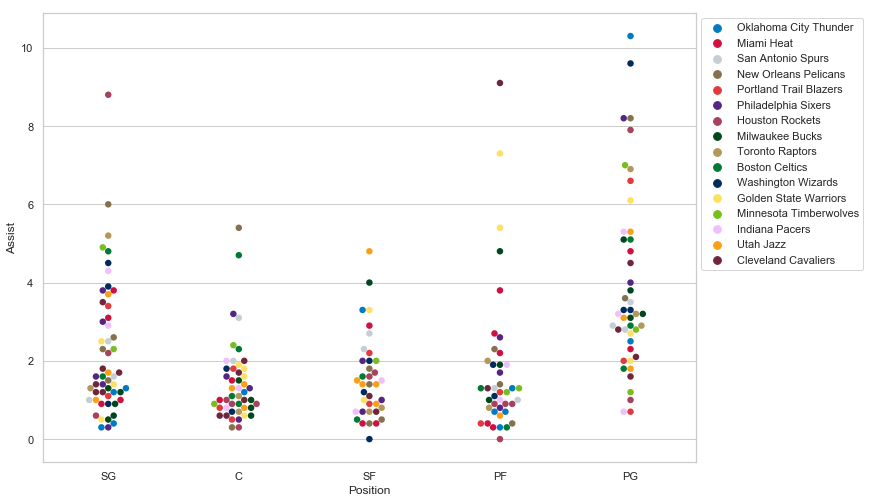

In [68]:
sns.swarmplot(x='Position', 
              y='Assist', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is shown that the Point Guard players contributed a lot in Assist numbers.
* The notable ones include Point Guard Players from Oklahoma City Thunder and Washington Wizards. 
* There is also a Power Forward player from the Cleveland Cavaliers and a Shooting Guard player from the Houston Rockets with high Assist numbers.

Let's see which players had the highest and lowest number of assists.

**Which players made the most assists per game?**

In [69]:
nba.loc[nba.Assist > 9, ["Player","Position","Team","Assist"]].sort_values(by='Assist', ascending=False)

,Player,Position,Team,Assist
625,Russell Westbrook,PG,Oklahoma City Thunder,10.3
613,John Wall,PG,Washington Wizards,9.6
303,LeBron James,PF,Cleveland Cavaliers,9.1


**Which players made the least assist per game?**

In [70]:
nba.loc[nba.Assist == 0, ["Player", "Position", "Team", "Assist"]]

,Player,Position,Team,Assist
530,Devin Robinson,SF,Washington Wizards,0.0
650,Brandan Wright,PF,Houston Rockets,0.0


### Steals per game

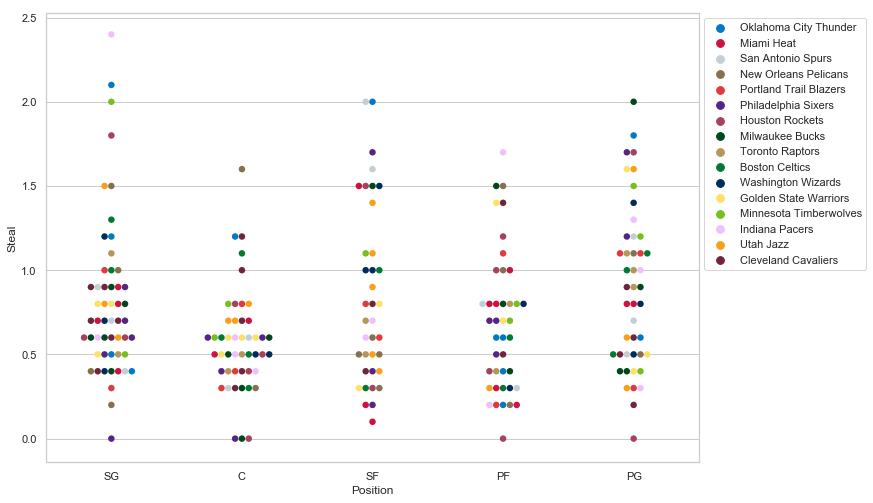

In [71]:
sns.swarmplot(x='Position', 
              y='Steal', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* It is shown that there is quite a number of Shooting Guard players with high number of steals.
* The notable ones include Shooting Guard players from the Indiana Pacers and Oklahoma City Thunder, a Point Guard player from Milwaukee Bucks and a Small Forward player from San Antonio Spurs. 

Let's see which players had the highest and lowest number of steals.

**Which overall players made the most steals per game?**

In [72]:
## Overall
nba.loc[nba.Steal > 1.9, ["Player","Position","Team", "Steal"]].sort_values(by='Steal', ascending=False)

,Player,Position,Team,Steal
472,Victor Oladipo,SG,Indiana Pacers,2.4
77,Corey Brewer,SG,Oklahoma City Thunder,2.1
59,Eric Bledsoe,PG,Milwaukee Bucks,2.0
93,Jimmy Butler,SG,Minnesota Timberwolves,2.0
209,Paul George,SF,Oklahoma City Thunder,2.0
362,Kawhi Leonard,SF,San Antonio Spurs,2.0


**Which Point Guard players made the most steals per game?**

In [73]:
## Point Guard 
nba.loc[(nba.Steal > 1.6) &
        (nba.Position == "PG"), ["Player","Position","Team", "Steal"]].sort_values(by='Steal', ascending=False)

,Player,Position,Team,Steal
59,Eric Bledsoe,PG,Milwaukee Bucks,2.0
625,Russell Westbrook,PG,Oklahoma City Thunder,1.8
488,Chris Paul,PG,Houston Rockets,1.7
554,Ben Simmons,PG,Philadelphia Sixers,1.7


**Which Shooting Guard players made the most steals per game?**

In [74]:
## Shooting Guard 
nba.loc[(nba.Steal > 1.9) &
        (nba.Position == "SG"), ["Player","Position","Team", "Steal"]].sort_values(by='Steal', ascending=False)

,Player,Position,Team,Steal
472,Victor Oladipo,SG,Indiana Pacers,2.4
77,Corey Brewer,SG,Oklahoma City Thunder,2.1
93,Jimmy Butler,SG,Minnesota Timberwolves,2.0


**Which Small Forward players made the most steals per game?**

In [75]:
## Small Forward 
nba.loc[(nba.Steal > 1.6) &
        (nba.Position == "SF"), ["Player","Position","Team", "Steal"]].sort_values(by='Steal', ascending=False)

,Player,Position,Team,Steal
209,Paul George,SF,Oklahoma City Thunder,2.0
362,Kawhi Leonard,SF,San Antonio Spurs,2.0
135,Robert Covington,SF,Philadelphia Sixers,1.7


**Which Power Forward players made the most steals per game?**

In [76]:
## Power Forward 
nba.loc[(nba.Steal > 1.4) &
        (nba.Position == "PF"), ["Player","Position","Team", "Steal"]].sort_values(by='Steal', ascending=False)

,Player,Position,Team,Steal
656,Thaddeus Young,PF,Indiana Pacers,1.7
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,1.5
148,Anthony Davis,PF,New Orleans Pelicans,1.5


**Which Center players made the most steals per game?**

In [77]:
## Center
nba.loc[(nba.Steal > 1.1) &
        (nba.Position == "C"), ["Player","Position","Team", "Steal"]].sort_values(by='Steal', ascending=False)

,Player,Position,Team,Steal
134,DeMarcus Cousins,C,New Orleans Pelicans,1.6
2,Steven Adams,C,Oklahoma City Thunder,1.2
450,Larry Nance,C,Cleveland Cavaliers,1.2


**Which players made the least steals per game?**

In [78]:
nba.loc[nba.Steal == 0, ["Player","Position","Team","Steal"]]

,Player,Position,Team,Steal
296,Aaron Jackson,PG,Houston Rockets,0.0
424,Greg Monroe,C,Milwaukee Bucks,0.0
470,Jahlil Okafor,C,Philadelphia Sixers,0.0
474,Chinanu Onuaku,C,Houston Rockets,0.0
650,Brandan Wright,PF,Houston Rockets,0.0
653,James Young,SG,Philadelphia Sixers,0.0


### Blocks per game

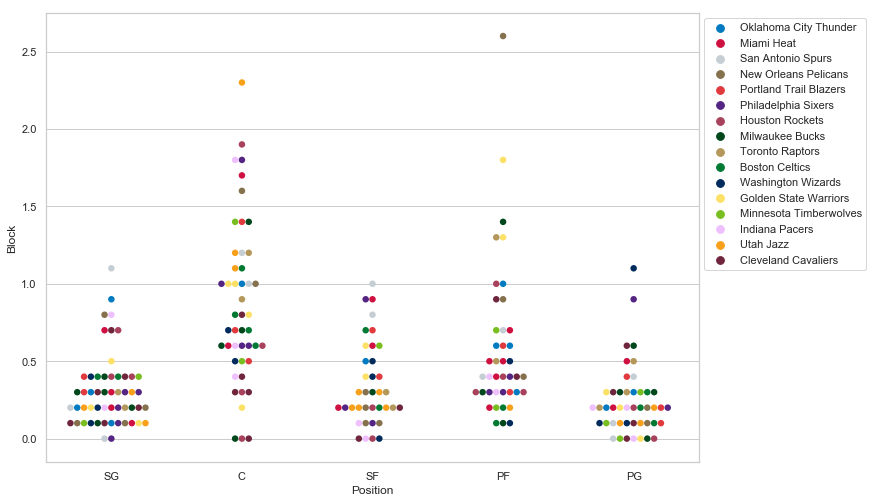

In [79]:
sns.swarmplot(x='Position', 
              y='Block', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* The Center and Power Forward positions obviously have the highest number of Blocks since they are the tallest ones.
* The notable ones include a Power Forward player from the New Orlean Pelicans and a Center player from the Utah Jazz. 

Let's see which players had the highest and lowest number of blocks.

**Which overall players made the most blocks per game?**

In [80]:
## Overall
nba.loc[nba.Block > 1.8, ["Player","Position","Team","Block"]].sort_values(by='Block', ascending=False)

,Player,Position,Team,Block
148,Anthony Davis,PF,New Orleans Pelicans,2.6
214,Rudy Gobert,C,Utah Jazz,2.3
103,Clint Capela,C,Houston Rockets,1.9


**Which Point Guard players made the most blocks per game?**

In [81]:
## Point Guard
nba.loc[(nba.Block > 0.5) &
        (nba.Position == "PG"), ["Player","Position","Team","Block"]].sort_values(by='Block', ascending=False)

,Player,Position,Team,Block
613,John Wall,PG,Washington Wizards,1.1
554,Ben Simmons,PG,Philadelphia Sixers,0.9
59,Eric Bledsoe,PG,Milwaukee Bucks,0.6
266,George Hill,PG,Cleveland Cavaliers,0.6


**Which Shooting Guard players made the most blocks per game?**

In [82]:
## Shooting Guard
nba.loc[(nba.Block > 0.7) &
        (nba.Position == "SG"), ["Player","Position","Team","Block"]].sort_values(by='Block', ascending=False)

,Player,Position,Team,Block
222,Danny Green,SG,San Antonio Spurs,1.1
529,Andre Roberson,SG,Oklahoma City Thunder,0.9
269,Jrue Holiday,SG,New Orleans Pelicans,0.8
472,Victor Oladipo,SG,Indiana Pacers,0.8


**Which Small Forward players made the most blocks per game?**

In [83]:
## Small Forward
nba.loc[(nba.Block > 0.8) &
        (nba.Position == "SF"), ["Player","Position","Team","Block"]].sort_values(by='Block', ascending=False)

,Player,Position,Team,Block
362,Kawhi Leonard,SF,San Antonio Spurs,1.0
135,Robert Covington,SF,Philadelphia Sixers,0.9
524,Josh Richardson,SF,Miami Heat,0.9


**Which Power Forward players made the most blocks per game?**

In [84]:
## Power Forward
nba.loc[(nba.Block > 1.2) &
        (nba.Position == "PF"), ["Player","Position","Team","Block"]].sort_values(by='Block', ascending=False)

,Player,Position,Team,Block
148,Anthony Davis,PF,New Orleans Pelicans,2.6
171,Kevin Durant,PF,Golden State Warriors,1.8
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,1.4
223,Draymond Green,PF,Golden State Warriors,1.3
284,Serge Ibaka,PF,Toronto Raptors,1.3


**Which Center players made the most blocks per game?**

In [85]:
## Center
nba.loc[(nba.Block > 1.7) &
        (nba.Position == "C"), ["Player","Position","Team","Block"]].sort_values(by='Block', ascending=False)

,Player,Position,Team,Block
214,Rudy Gobert,C,Utah Jazz,2.3
103,Clint Capela,C,Houston Rockets,1.9
177,Joel Embiid,C,Philadelphia Sixers,1.8
594,Myles Turner,C,Indiana Pacers,1.8


**Which players made the least blocks per game?**

**Note:** Center and Power Forward positions only

In [86]:
nba.loc[((nba.Block == 0) & (nba.Position == "C")) | 
        ((nba.Block == 0) & (nba.Position == "PF")), ["Player","Position","Team","Block"]]

,Player,Position,Team,Block
424,Greg Monroe,C,Milwaukee Bucks,0.0
474,Chinanu Onuaku,C,Houston Rockets,0.0
497,Kendrick Perkins,C,Cleveland Cavaliers,0.0


### Turnovers per game

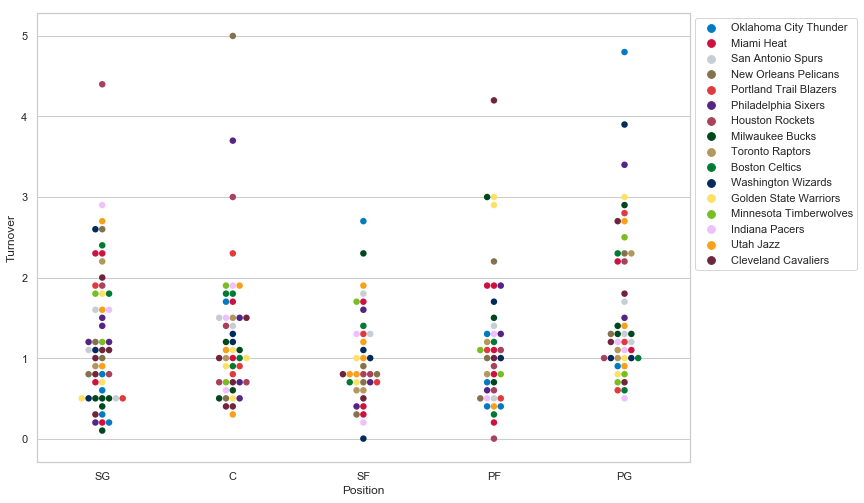

In [87]:
sns.swarmplot(x='Position', 
              y='Turnover', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* The point guard position takes the longest time with the ball, so it makes sense that this position contributed highly in turnover counts.
* The notable ones include a Center player from the New Orlean Pelicans and a Point Guard player from the Oklahoma City Thunder.

Let's see which players had the highest number of turnovers below.

**Which players made the most turnovers per game?**

In [88]:
nba.loc[nba.Turnover > 4, ["Player","Position","Team","Turnover"]].sort_values(by='Turnover', ascending=False)

,Player,Position,Team,Turnover
134,DeMarcus Cousins,C,New Orleans Pelicans,5.0
625,Russell Westbrook,PG,Oklahoma City Thunder,4.8
232,James Harden,SG,Houston Rockets,4.4
303,LeBron James,PF,Cleveland Cavaliers,4.2


### Personal Fouls per game

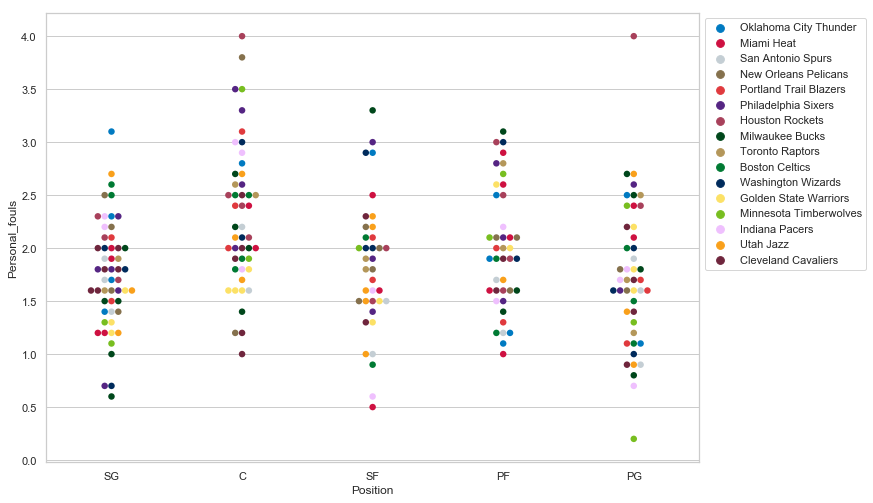

In [89]:
sns.swarmplot(x='Position', 
              y='Personal_fouls', 
              data = nba, 
              hue='Team',
              palette = teams_palette,
              size=6.5) 
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* There are quite a number of Center players that contributed to the numbers of most personal fouls per game.
* The notable ones include Center players from the Houston Rockets and New Orlean Pelicans.
* There is also one Point Guard player from the Houston Rockets that had a high personal fouls count.

Let's see which players had the highest number of personal fouls below.

**Which overall players made the most personal fouls per game?**

In [90]:
## Overall
nba.loc[nba.Personal_fouls > 3.5, ["Player","Position","Team","Personal_fouls"]].sort_values(by='Personal_fouls', ascending=False)

,Player,Position,Team,Personal_fouls
296,Aaron Jackson,PG,Houston Rockets,4.0
474,Chinanu Onuaku,C,Houston Rockets,4.0
134,DeMarcus Cousins,C,New Orleans Pelicans,3.8


**Which Point Guard players made the most personal fouls per game?**

In [91]:
## Point Guard
nba.loc[(nba.Personal_fouls > 2.6) &
        (nba.Position == "PG"), ["Player","Position","Team","Personal_fouls"]].sort_values(by='Personal_fouls', ascending=False)

,Player,Position,Team,Personal_fouls
296,Aaron Jackson,PG,Houston Rockets,4.0
78,Malcolm Brogdon,PG,Milwaukee Bucks,2.7
538,Ricky Rubio,PG,Utah Jazz,2.7


**Which Shooting Guard players made the most personal fouls per game?**

In [92]:
## Shooting Guard
nba.loc[(nba.Personal_fouls > 2.5) &
        (nba.Position == "SG"), ["Player","Position","Team","Personal_fouls"]].sort_values(by='Personal_fouls', ascending=False)

,Player,Position,Team,Personal_fouls
77,Corey Brewer,SG,Oklahoma City Thunder,3.1
420,Donovan Mitchell,SG,Utah Jazz,2.7
84,Jaylen Brown,SG,Boston Celtics,2.6


**Which Small Forward players made the most personal fouls per game?**

In [93]:
## Small Forward
nba.loc[(nba.Personal_fouls > 2.6) &
        (nba.Position == "SF"), ["Player","Position","Team","Personal_fouls"]].sort_values(by='Personal_fouls', ascending=False)

,Player,Position,Team,Personal_fouls
411,Khris Middleton,SF,Milwaukee Bucks,3.3
135,Robert Covington,SF,Philadelphia Sixers,3.0
209,Paul George,SF,Oklahoma City Thunder,2.9
476,Kelly Oubre,SF,Washington Wizards,2.9


**Which Power Forward players made the most personal fouls per game?**

In [94]:
## Point Forward
nba.loc[(nba.Personal_fouls > 2.9) &
        (nba.Position == "PF"), ["Player","Position","Team","Personal_fouls"]].sort_values(by='Personal_fouls', ascending=False)

,Player,Position,Team,Personal_fouls
15,Giannis Antetokounmpo,PF,Milwaukee Bucks,3.1
433,Markieff Morris,PF,Washington Wizards,3.0
650,Brandan Wright,PF,Houston Rockets,3.0


**Which Center players made the most personal fouls per game?**

In [95]:
## Center
nba.loc[(nba.Personal_fouls > 3.3) &
        (nba.Position == "C"), ["Player","Position","Team","Personal_fouls"]].sort_values(by='Personal_fouls', ascending=False)

,Player,Position,Team,Personal_fouls
474,Chinanu Onuaku,C,Houston Rockets,4.0
134,DeMarcus Cousins,C,New Orleans Pelicans,3.8
470,Jahlil Okafor,C,Philadelphia Sixers,3.5
591,Karl-Anthony Towns,C,Minnesota Timberwolves,3.5


## Extra plot:

### Three points attempted vs Three points made

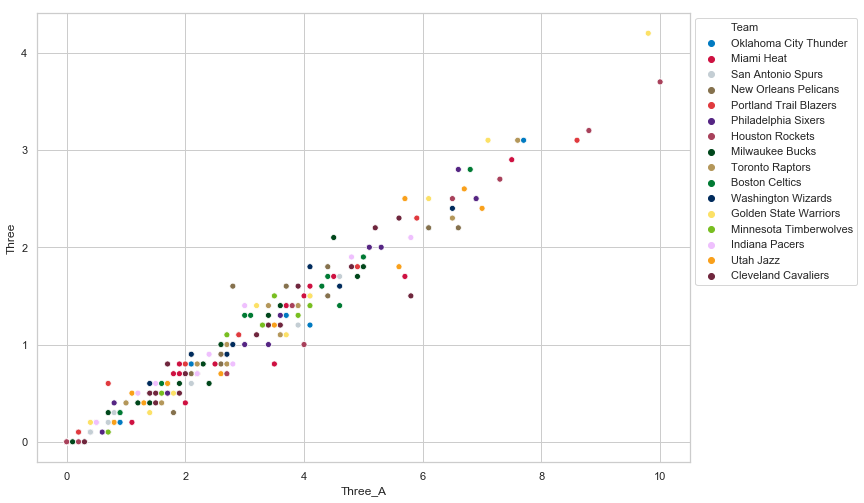

In [96]:
sns.scatterplot(x='Three_A', 
              y='Three', 
              data = nba, 
              hue='Team',
              palette = teams_palette)  
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

* The plot does show an increasing trend in three point shots made if more three point shots are attempted.

* The strategy seems to be most effective on the Golden State Warriors and Houston Rockets.